In [5]:
%matplotlib inline
import pylab as plt
import numpy as np
import blimpy as bl
from scipy import signal, interpolate
import rfi
import peakutils

In [6]:
path="data/"
gps1="20200917_guppi_59046_53079_001660_J0825-5010_0001-ics.rawspec.0000.combined.fil"
gps2="20200917_guppi_59074_56719_004562_J0835-4510_0001-ics.rawspec.0000.combined.fil"
gps6="20200917_guppi_59086_58889_001614_Unknown_0001-ics.rawspec.0000.combined.fil"
gps4="20200917_guppi_59087_55680_001685_J1101-6424_0001-ics.rawspec.0000.combined.fil"
gps5="20200917_guppi_59087_75602_005655_J2129-5721_0001-ics.rawspec.0000.combined.fil"
gps3="20200917_guppi_59109_53457_003376_J1644-4559_0001-ics.rawspec.0000.combined.fil"
gps7="20200917_guppi_59143_54504_000454_J1939-6342_0001-ics.rawspec.0000.combined.fil"
gps8="20200917_guppi_59143_55142_000486_GPS-BIIR-11_0001-ics.rawspec.combined.fil"
gps=[gps1,gps2,gps4,gps5,gps6]
gps_1=[gps7,gps8]
GPS=[gps1,gps2,gps3,gps4,gps5,gps6,gps7,gps8]

In [7]:
wgps=[]
wgps_1=[]
w=[]
for i in gps:
    wgps.append(bl.Waterfall(path+i))
for i in gps_1:
    wgps_1.append(bl.Waterfall(path+i))
for i in GPS:
    w.append(bl.Waterfall(path+i))

In [83]:
lm=rfi.localmax(wgps[0],dist=25)

extracting integration 0...


938.7578125 946.490234375
1122.6640625 1122.6640625
1153.384765625 1173.865234375
1214.19921875 1214.19921875
1313.048828125 1313.048828125
1416.49609375 1468.115234375


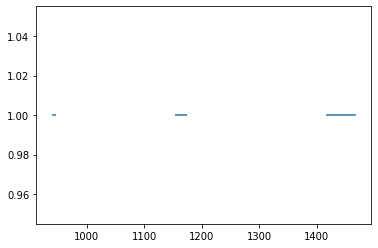

In [84]:
fig=plt.figure()
for j in lm:
#    print((j[0],1),j[1]-j[0])
#     rect=matplotlib.patches.Rectangle((j[0],1),j[1]-j[0],0.5)
#     ax.add_patch(rect)
    #r=np.linspace(j[0],j[1])
    plt.hlines(1,j[0],j[1])
    print(j[0],j[1])
plt.savefig('test.pdf')

(544.0, 1712.0)

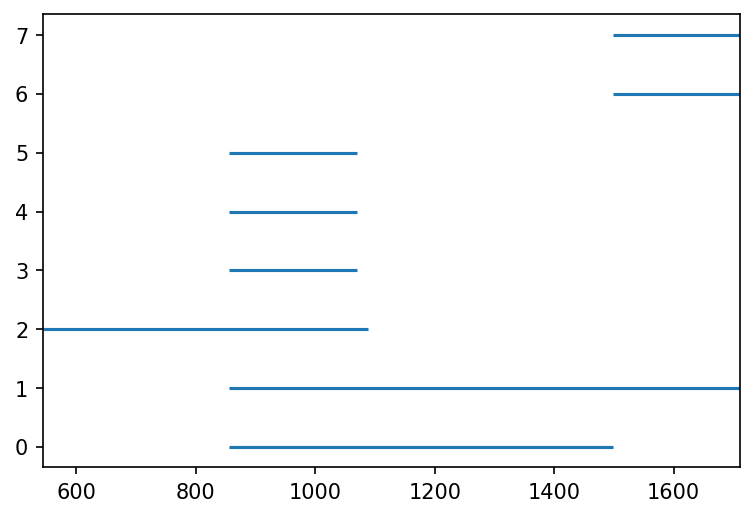

In [16]:
plt.figure(dpi=150)
for i in range(len(w)):
    plt.hlines(i,w[i].container.f_begin,w[i].container.f_end)
plt.xlim(544,1712)

extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...


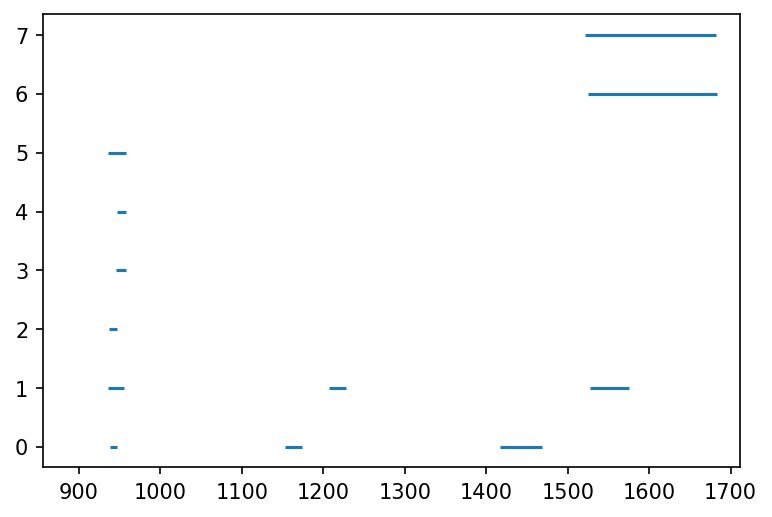

In [11]:
plt.figure(dpi=150)
for i in range(len(w)):
    lm=rfi.localmax(w[i],dist=25)
    for j in lm:
        plt.hlines(i,float(j[0]),float(j[1]))
plt.xlim(856,1712)
plt.savefig('test.pdf')

In [94]:
i=0
rfi=[]
while i<len(peak[0])-1:
    start=plot_f[peak[0][i]]
    if(plot_f[peak[0][i+1]]-start<=30):
        end=plot_f[peak[0][i+1]]
        length=len(peak[0][i+1:])
        for j in range(length):
            if j==length-1:
                end=plot_f[peak[0][i+1:][j]]
                i+=j+1
                rfi.append((start,end))
                break
            else:
                if (abs(plot_f[peak[0][i+1:][j]]-end)<=30):
                    end=plot_f[peak[0][i+1:][j]]
                else:
                    i+=j+1
                    if(j==0):
                        rfi.append((start,start))
                    else:
                        rfi.append((start,end))
                    break
    else:
        rfi.append((start,start))
        i+=1
rfi

[(935.83203125, 955.267578125),
 (1176.1640625, 1176.1640625),
 (1206.884765625, 1227.365234375),
 (1268.326171875, 1268.326171875),
 (1420.048828125, 1420.048828125),
 (1527.884765625, 1574.697265625)]

In [5]:
for i in wgps:
    print(i.header['src_raj'])
    print(i.header['src_dej'])

8h26m01.91s
-47d14m54.5s
8h26m01.91s
-47d14m54.5s
16h46m18.14s
-46d01m29s
8h26m01.91s
-47d14m54.5s
8h26m01.91s
-47d14m54.5s
8h26m01.91s
-47d14m54.5s


extracting integration 0...
extracting integration 0...
extracting integration 0...


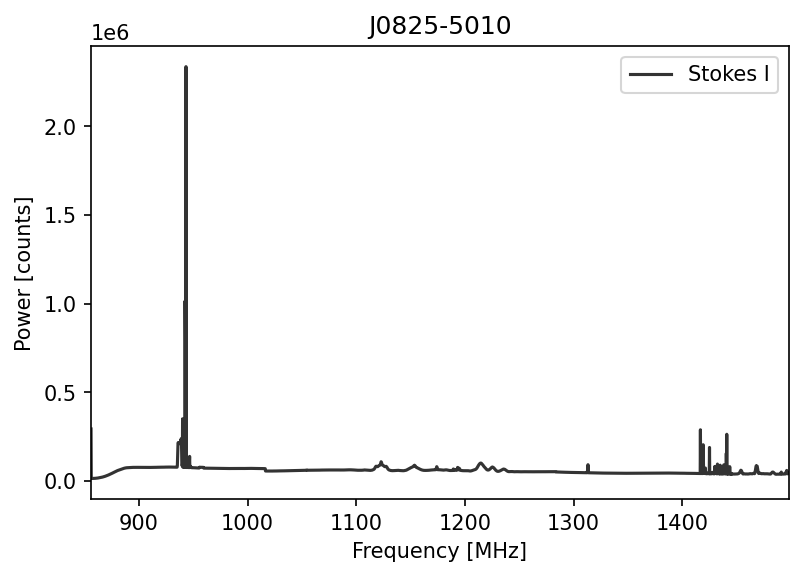

In [61]:
plt.figure(dpi=150)
wgps[0].plot_spectrum()
f=wgps[0].get_power()[0]
power=wgps[0].get_power()[1]
base=peakutils.baseline(power)
env=peakutils.envelope(power)
a=interpolate.splrep(f,power,k=5)
#plt.plot(f,base_1)
#plt.plot(a[0],a[1])

In [43]:
f=wgps[1].get_freqs()
power=wgps[1].get_power()[1]
lower=np.argmax(f>900)
upper=np.argmin(f<1668)
base=peakutils.baseline(power[lower:upper],deg=4)
print(lower,upper)

extracting integration 0...
211 3886


extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...


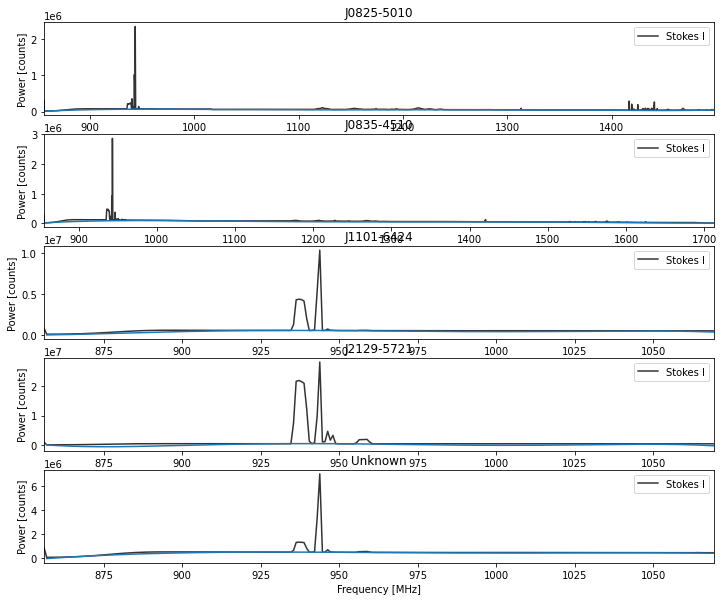

In [10]:
plt.figure(figsize=(12,12))
for i in range(len(wgps)):
    plt.subplot(6,1,i+1)
    wgps[i].plot_spectrum()
    f=wgps[i].get_freqs()[1:]
    power=wgps[i].get_power()[1][1:]
#     if wgps[i].container.f_start<900:
#         lower=np.argmax(f>900)
#     else:
#         lower=0
#     if wgps[i].container.f_stop>1668:
#         upper=np.argmin(f<1668)
#     else:
#         upper=len(power)
#     if i<2:
#         base=peakutils.baseline(power[lower:upper],deg=4)
#     else:
#         base=peakutils.baseline(power[lower:upper],deg=0)
    #plt.yscale('log')
    base=peakutils.baseline(power,deg=5)
    plt.plot(f,base)

extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...


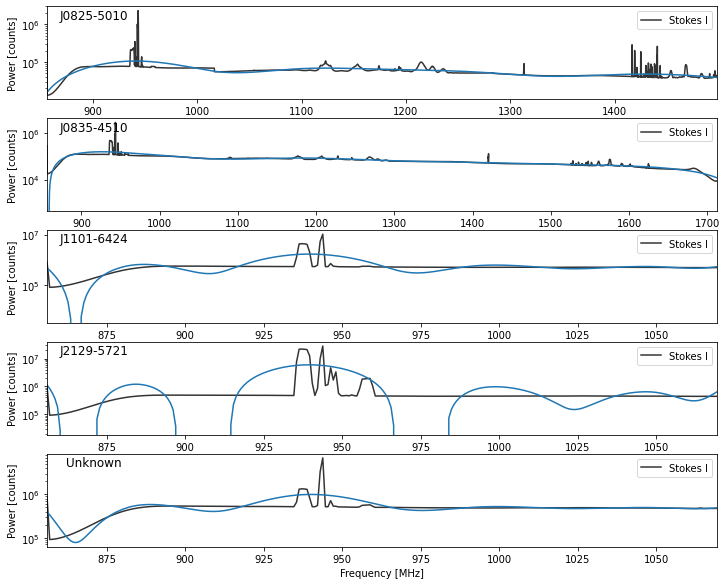

In [60]:
plt.figure(figsize=(12,12))
for i in range(len(wgps)):
    plt.subplot(6,1,i+1)
    wgps[i].plot_spectrum()
    f=wgps[i].get_power()[0]
    power=wgps[i].get_power()[1]
    if wgps[i].container.f_start<900:
        lower=np.argmax(f>900)
    else:
        lower=0
    if wgps[i].container.f_stop>1668:
        upper=np.argmin(f<1668)
    else:
        upper=len(power)
    base=rfi.baseline(wgps[i],spl_order=8)
    plt.plot(f,base)
    if(i!=len(wgps)-1):
        #plt.xticks([])
        plt.xlabel('')
#     plt.axvline(x=935,linestyle='--')
#     plt.axvline(x=940,linestyle='--')
#     plt.axvline(x=940,linestyle='--')
    plt.yscale('log')
    #plt.ylim(0,1e8)
    plt.title(wgps[i].header.get('source_name'),x=0.07,y=0.8)
#plt.subplots_adjust(hspace=0)
plt.savefig('RFI_rescaled.pdf')
plt.show()

extracting integration 0...
extracting integration 0...


(array([ 544.       ,  544.1328125,  544.265625 , ..., 1087.6015625,
        1087.734375 , 1087.8671875]),
 array([28278.707 , 10560.504 , 10567.939 , ...,  1088.8534,  1094.1522,
         1117.8947], dtype=float32))

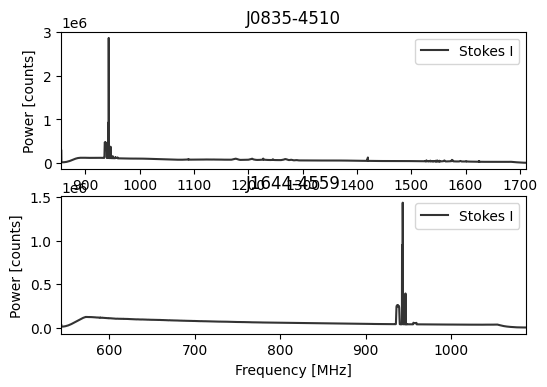

In [87]:
plt.figure(dpi=100)
plt.subplot(2,1,1)
wgps[1].plot_spectrum()
plt.subplot(2,1,2)
wgps[2].plot_spectrum()

extracting integration 0...


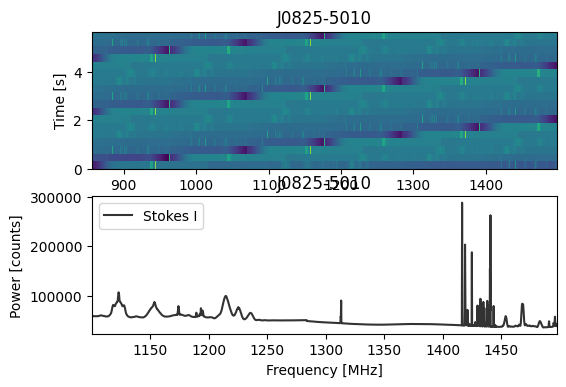

In [17]:
plt.figure(dpi=100)
plt.subplot(2,1,1)
wgps[0].plot_waterfall(cb=False)
plt.subplot(2,1,2)
wgps[0].plot_spectrum(f_start=1100)

In [68]:
a=wgps_1[0].get_freqs()
np.argmin(a<1675)

847

extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...


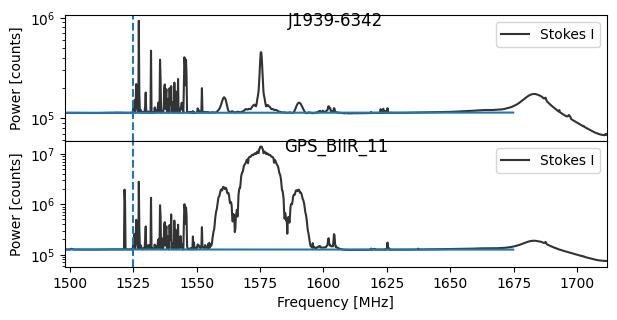

In [89]:
plt.figure(dpi=100,figsize=(7,5))
for i in range(len(wgps_1)):
    plt.subplot(3,1,i+1)
    wgps_1[i].plot_spectrum()
    f=wgps_1[i].get_power()[0]
    power=wgps_1[i].get_power()[1]
    base=peakutils.baseline(power[:847],deg=1)
    plt.plot(f[:847],base)
    if(i!=len(wgps_1)-1):
        plt.xticks([])
        plt.xlabel('')
    #plt.ylim()
    plt.axvline(x=1525,linestyle='--')
    plt.title(wgps_1[i].header.get('source_name'),x=0.5,y=0.85)
    plt.yscale('log')
plt.subplots_adjust(hspace=0)
#plt.savefig('result/RFI_1.pdf')
plt.show()

extracting integration 0...


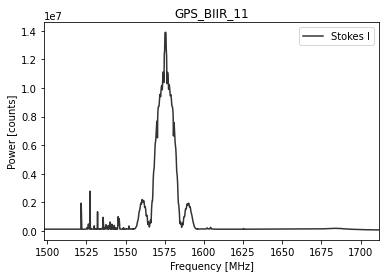

In [71]:
wgps_1[1].plot_spectrum()

extracting integration 0...


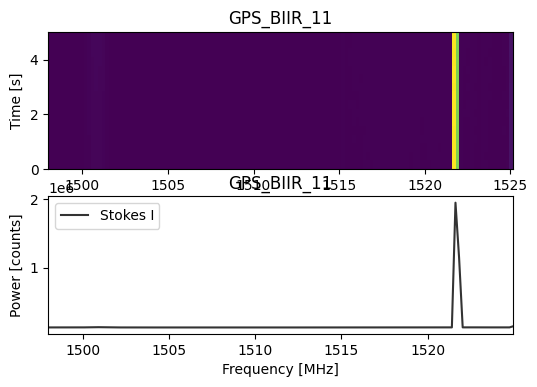

In [31]:
plt.figure(dpi=100)
plt.subplot(2,1,1)
wgps_1[1].plot_waterfall(f_stop=1525,cb=False)
plt.subplot(2,1,2)
wgps_1[1].plot_spectrum(f_stop=1525)

extracting integration 0...


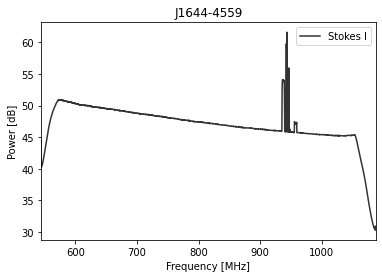

In [19]:
wgps[2].plot_spectrum(logged=True)
plt